<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing, fashion_mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
# IMPORT DATA
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train = pd.DataFrame(X_train, columns=headers)
X_test = pd.DataFrame(X_test, columns=headers)

In [153]:
# NORMALIZE
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [154]:
# INSTANTIATE MODEL
model = Sequential()

In [155]:
# ADDING LAYERS
model.add(Dense(13, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [156]:
# COMPILE MODEL
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [157]:
# FIT MODEL
epochs = 50
results = model.fit(X_train, y_train, epochs=epochs, verbose=False)

In [158]:
# REPORT ACCURACY
final_loss = results.history['loss'][-1]
final_mse = results.history['mse'][-1]
final_mae = results.history['mae'][-1]
print('Final Loss:', final_loss)
print('Final MSE:', final_mse)
print('Final MAE:', final_mae)

Final Loss: 542.3704069534151
Final MSE: 542.3704
Final MAE: 21.395048


In [159]:
# MAKE GRAPHS OF LOSS / ACCURACIES
def plot_nn(history, epochs):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(epochs), history['loss'], label='Loss')
    ax.plot(range(epochs), history['mse'], label='Mean Squared Error')
#     ax.plot(range(epochs), history['mae'], label='Mean Absolute Error')
    ax.set_xlabel('Epochs')
    ax.legend()

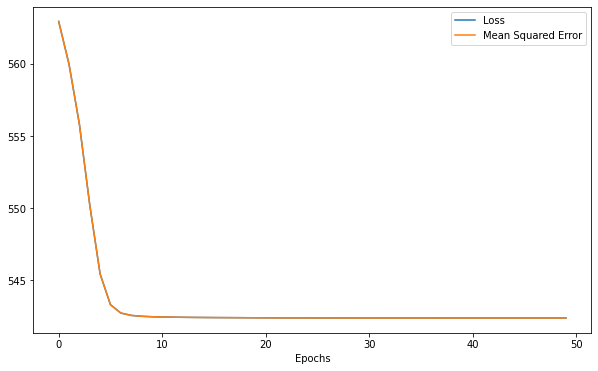

In [160]:
plot_nn(results.history, epochs)

In [161]:
# RUN THE SAME FOR LINEAR REGRESSION
model = LinearRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [162]:
def print_metrics(target, predictions):
    mse = mean_squared_error(target, predictions)
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    print(f'Mean Squared Error: {mse:,.2f}')
    print(f'Mean Absolute Error: {mae:,.2f}')
    print(f'R-squared: {r2:,.4f}')

In [163]:
print_metrics(y_train, train_pred)

Mean Squared Error: 22.77
Mean Absolute Error: 3.22
R-squared: 0.7309


In [164]:
print_metrics(y_test, test_pred)

Mean Squared Error: 18.17
Mean Absolute Error: 3.17
R-squared: 0.7818


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [198]:
# LOAD DATA
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [199]:
# NORMALIZE DATA
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)
X_train = X_train / 255
X_test = X_test / 255

In [200]:
# ONE-HOT ENCODING
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [208]:
#### QUESTION: DO WE NEED TO USE Flatten() HERE?
# INSTANTIATE MODEL
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# COMPILE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# FIT MODEL
epochs = 10
results = model.fit(X_train, y_train, epochs=epochs, verbose=False)

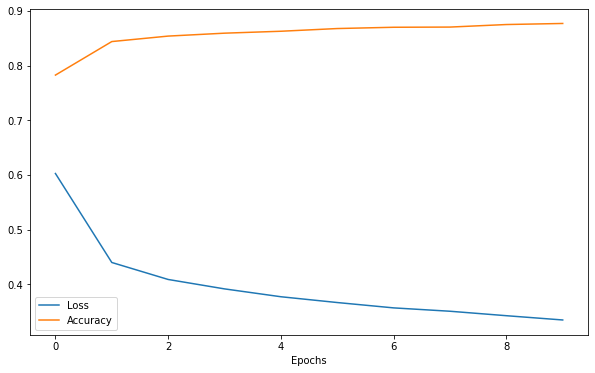

In [209]:
#### TO DO: updage function to dynamically plot metrics
# GRAPH
def plot_nn(history, epochs):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(epochs), history['loss'], label='Loss')
    ax.plot(range(epochs), history['accuracy'], label='Accuracy')
    ax.set_xlabel('Epochs')
    ax.legend()
plot_nn(results.history, epochs)

In [210]:
#### TO DO: USE model.evaluate, wrap in a function
# REPORT ACCURACY
final_loss = results.history['loss'][-1]
final_acc = results.history['accuracy'][-1]
print('Final Loss:', final_loss)
print('Final Accuracy:', final_acc)

Final Loss: 0.33484796139796574
Final Accuracy: 0.87695


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.